# Bayesian Simulation

In a previous post, we applied chained Bayesian logic to interpret a positive COVID-19 test result (https://crawstat.com/2020/06/05/chained-bayesian-interpreting-a-positive-covid-19-test-result/). We've also constructed a couple of simulations, for example, here (https://crawstat.com/2020/05/29/simulating-the-effects-of-non-representative-sample-and-sample-size/) and here (https://crawstat.com/2020/05/22/danae-shaelo-on-strawberry-summit/). 

Today, we'll construct a Bayesian simulation to demonstrate how a Bayesian update based on new observations improves our prior belief about the world, in this case about systolic blood pressure. We'll start with our "prior" and, after observing new information, run simulations that update our understanding with a posterior distribution that gets closer to the observed distribution with each new observation. Let's dive in. 

In [144]:
# Import relevant libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st

In [145]:
# We're going to be using seaborn for plots, set style to darkgrid
sns.set_style("darkgrid")
sns.set(style='ticks', palette='Set2')

From our previous analysis of the NHANES national health data set from 2016 (https://crawstat.com/2020/06/09/uninsured-racial-disparity-blood-pressure-gender-smoker-diffs/), we observed that systolic blood pressure had a normal distribution with a mean of roughly 125 mmHg and a standard deviation of about 18 mmHg. Let's use this to simulate our "prior" below with a normal distribution of 1,000 observations. 

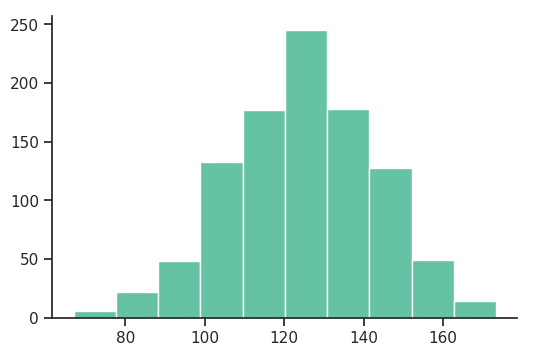

In [128]:
# Simulate prior distribution with 1,000 values of mean 125 and standard deviation 18. 
prior_dist = np.random.normal(125, 18, 1000)
plt.figure(dpi=100)
plt.hist(prior_dist)
sns.despine()

We've recently collected new systolic blood pressure data and find that it has a different normal distribution with a mean of 135 mmHg and standard deviation of 10 mmHg (perhaps peoples' blood pressure increased with the COVID-19 crisis). 

We can use this new information to construct our posterior distribution by updating our prior distribution, calculating the mean and variance after each observation (x below refers to our new observed distribution):

$Updated\ Prior\ Mean = \frac{\sigma_{prior}^2x  +  \sigma_{observed}^2\mu_{prior}}{\sigma_{observed}^2 + \sigma_{prior}^2}$

$Updated\ Prior\ Variance = \frac{\sigma_{observed}^2\sigma_{prior}^2}{\sigma_{observed}^2 + \sigma_{prior}^2}$

In [146]:
# Set set for reproducibility
np.random.seed(12345)

# Simulate 1,000 values of mean 135 and standard deviation 10
observed_dist = np.random.normal(135, 10, 1000)

# Priors: Create a list of 1,000 values equal to the mean 125 (below this will be updated after each observation)
mu = [125] * 1000

# Priors: Create a list of 1,000 values equal to the standard deviation 18 (below this will be updated after each observation)
sigma = [18] * 1000

# Updated prior mean and variance based on equations above
mu[0] = (18**2 * observed_dist[0] + (10**2) * 125) / (10**2 + 18**2)
sigma[0] = (10**2 * 18**2) / (10**2 + 18**2)

# Update mu and sigma after each new observation 
for i in range(1000):
    if i == 999:
        break # Include break to exit out of the loop at index 999 as the next index is our last
    mu[i + 1] = (sigma[i]**2 * observed_dist[i+1] + (10**2) * mu[i])  / (10**2 + sigma[i]**2)
    sigma[i + 1] = (10**2 * sigma[i]) / (10**2 + sigma[i])
    
# Create shell for posterior distribution after up to 20 observations
posterior_dist = [[]] * 20

# Fill posterior distributions array with distribution based on updated mu and sigma after each observation
for i in range(20):
    posterior_dist[i] = np.random.normal(mu[i], sigma[i], 1000)

After just 1 observation, the posterior disribution seems to be centered at a slightly higher mean, though its error (sigma) is very large. 

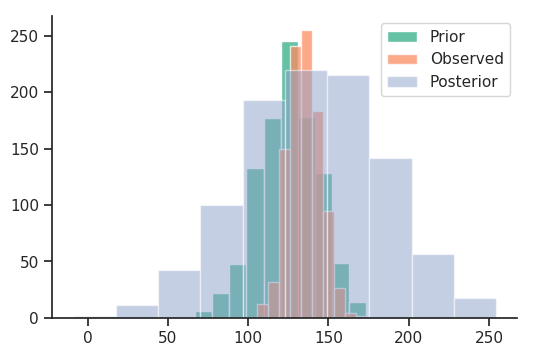

In [147]:
# Plot histograms of prior, observed, and posterior distributions together after 1 observation
plt.figure(dpi=100)
plt.hist(prior_dist)
plt.hist(observed_dist, alpha = 0.75)
plt.hist(posterior_dist[1], alpha = 0.5)
plt.legend(labels=["Prior","Observed","Posterior"])
sns.despine()

After 5 observations, our posterior distribution is bit better than before and getting closer to the observed distribution. 

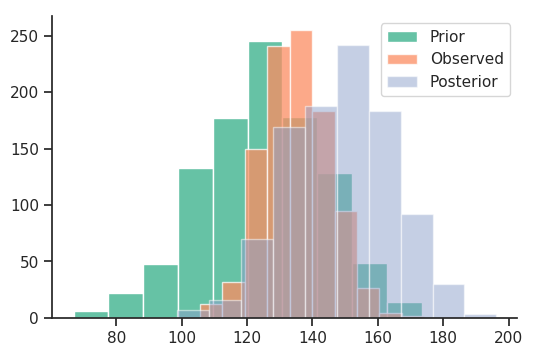

In [148]:
# Plot histograms of prior, observed, and posterior distributions together after 5 observations
plt.figure(dpi=100)
plt.hist(prior_dist)
plt.hist(observed_dist, alpha = 0.75)
plt.hist(posterior_dist[5], alpha = 0.5)
plt.legend(labels=["Prior","Observed","Posterior"])
sns.despine()

After 10 observations, our posterior distribution looks closer to the observed, with a lower sigma. 

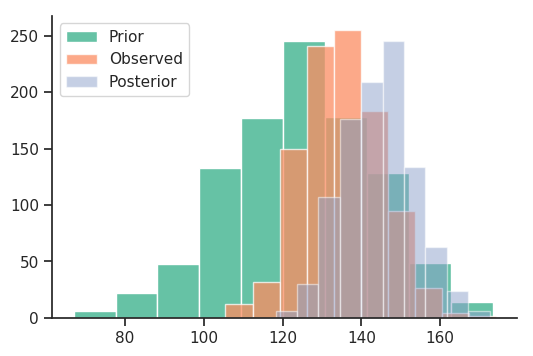

In [149]:
# Plot histograms of prior, observed, and posterior distributions together after 10 observations
plt.figure(dpi=100)
plt.hist(prior_dist)
plt.hist(observed_dist, alpha = 0.75)
plt.hist(posterior_dist[10], alpha = 0.5)
plt.legend(labels=["Prior","Observed","Posterior"])
sns.despine()

After 18 observations, our posterior distribution looks even closer to the observed with a much tighter sigma. 

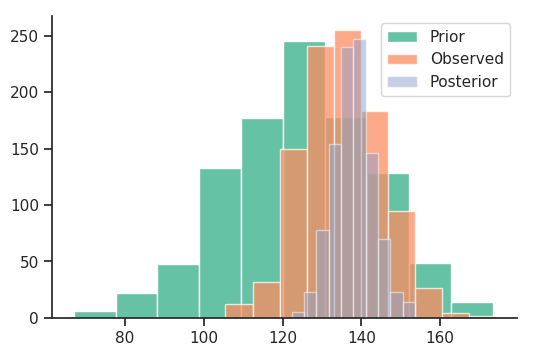

In [152]:
# Plot histograms of prior, observed, and posterior distributions together after 18 observations
plt.figure(dpi=100)
plt.hist(prior_dist)
plt.hist(observed_dist, alpha = 0.75)
plt.hist(posterior_dist[18], alpha = 0.5)
plt.legend(labels=["Prior","Observed","Posterior"])
sns.despine()